In [100]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
### Q1 Read the input file and check the data dimension

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [4]:
data = pd.read_csv('german_credit.csv')

In [5]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
data.shape

(1000, 21)

In [7]:
# Lets build a Ensemble model but need to modify the dataset first

In [8]:
### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
data_df = pd.get_dummies(data)

In [11]:
# Print Shape of model data
data_df.shape

(1000, 62)

In [12]:
### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
data.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [14]:
### Drop the original variables which are converted to dummy

In [17]:
data_df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_.. >= 1000 DM,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_.. >= 7 years,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_female : divorced/separated/married,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,property_if not A121 : building society savings agreement/ life insurance,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [19]:
print('original variable already got droped')

original variable already got droped


In [20]:
### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [61]:
X = data_df.drop('default' , axis=1)
y = data_df['default']
X_train, X_test, y_train, y_test = train_test_split(data_df, y, test_size=0.3,random_state=77)

In [62]:
### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [63]:
clf = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion="entropy",random_state=9999)

In [64]:
### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [65]:
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [68]:
metrics.confusion_matrix(y_test,y_pred)

array([[214,   0],
       [  0,  86]], dtype=int64)

In [69]:
### Q6 Show the list of the features importance( 1 Marks)


In [70]:
importances = clf.feature_importances_


In [71]:
importances

array([5.98025790e-01, 3.49973570e-02, 4.04421470e-02, 1.22010790e-02,
       1.18161259e-02, 2.87860198e-02, 7.00306676e-03, 4.00227805e-03,
       9.44743121e-03, 1.29322444e-02, 2.80218082e-03, 3.11177671e-02,
       4.38201100e-03, 1.06530195e-02, 4.91656195e-03, 4.96387232e-03,
       4.45416840e-03, 4.21679167e-03, 4.24638233e-03, 5.37219230e-03,
       5.01317983e-03, 5.55554122e-03, 1.44895634e-03, 4.57747823e-04,
       4.62598395e-03, 9.47746375e-04, 4.80324847e-04, 2.25525299e-03,
       8.74157987e-03, 2.96936995e-03, 2.76528037e-03, 6.44770384e-03,
       4.42146402e-03, 4.49880597e-03, 4.67047315e-03, 4.33548317e-03,
       2.95295000e-03, 4.84341224e-03, 2.06707173e-03, 2.53832163e-03,
       5.75089104e-03, 3.19438980e-03, 2.63866061e-03, 3.48620014e-03,
       4.74225353e-03, 4.74790519e-03, 6.83962781e-03, 4.51796086e-03,
       4.49238514e-03, 5.69495983e-03, 3.30881824e-03, 3.68557768e-03,
       5.95664427e-03, 4.14921582e-03, 4.80066857e-03, 5.54489116e-03,
      

In [72]:
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.5980257899562376, 'default'), (0.04044214704545156, 'credit_amount'), (0.03499735704316079, 'duration_in_month'), (0.03111776712101682, 'account_check_status_no checking account'), (0.028786019770120103, 'age'), (0.01293224440806046, 'account_check_status_< 0 DM'), (0.012201078988958494, 'installment_as_income_perc'), (0.011816125925266376, 'present_res_since'), (0.010653019501742939, 'credit_history_critical account/ other credits existing (not at this bank)'), (0.009447431207901267, 'account_check_status_0 <= ... < 200 DM'), (0.008741579869865028, 'savings_... < 100 DM'), (0.007003066760795374, 'credits_this_bank'), (0.006839627812274068, 'property_real estate'), (0.006447703835130476, 'savings_unknown/ no savings account'), (0.005956644271592934, 'housing_own'), (0.005750891043427862, 'personal_status_sex_male : single'), (0.005694959833560624, 'other_installment_plans_none'), (0.005555541215106982, 'purpose_domestic appliances'), (0.005544891163497845

In [73]:
### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [74]:
# Use below values
num_folds = 10
seed = 77

In [75]:
kfold = KFold(n_splits=10,shuffle= True, random_state=77)

In [76]:
kfold

KFold(n_splits=10, random_state=77, shuffle=True)

In [77]:
#Validate the Random Forest model build above using k fold

In [93]:
myList = list(range(1,100))
cv_scores = []
k_neighbors = []
scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')


In [94]:
#Calculate Mean score
print('Mean score:', scores.mean())

Mean score: 1.0


In [95]:
# Calculate score standard deviation using std()

In [96]:
scores.std()

0.0

In [97]:
# Q8 Print the confusion matrix( 1 Marks)

In [98]:
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
metrics.confusion_matrix(y_test,predicted)

array([[214,   0],
       [  0,  86]], dtype=int64)

In [88]:
# Q9.Classification accuracy: 
#percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.( 1 Marks)

In [102]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [103]:
# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [104]:
y_pred_proba = clf.predict_proba(X_test)[::,1]

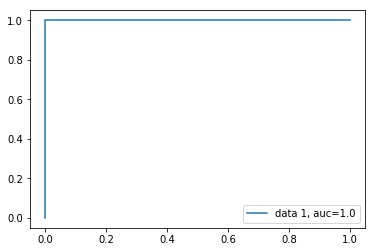

In [105]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [106]:
#Hint: Use roc_curve

In [108]:
print('ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context


In [109]:
# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [110]:
### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [111]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []